<a href="https://colab.research.google.com/github/horlahsunbo/Predicting-customers-churning-rate/blob/main/Advance_data_mining_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 1**

### Johanna Ruff, Gideon Olasunbo Popoola, Jordan Dood

## **Introduction**

Churn is one of the most important forces in the telecommunications industry (Ahmed 2017). Churn refers to the process of a customer leaving a service, and is even more important than growth in mature markets. The ability to predict if a customer is likely to leave is crucial for the overall business performance. Utilizing extensive customer data collected from our service we have been able to build a statistical model which predicts if a customer is in danger of leaving so that retention measures may be employed where they will have the greatest return. The model is a Quadratic Discriminant Analysis based on the number of customer service calls and the number of voicemails on each account. Of the 5 variables considered when building this model, these two were found to have the greatest predictive power. The model is able to accurately predict a customer leaving 86.2% of the time, but with 85.81% of 'at risk' customers not being successfully identified. This model is the best of no less than three models, the construction and testing of which is discussed in this report.  

## **Data Exploration**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import os
import seaborn as sns

In [ ]:
df_old = pd.read_csv('Customer_telecom.csv')

Because of the large number of potential variables present in the available dataset we decided to begin by eliminating any which lacked strong predictive power. To do this we first plotted a heat map showing the correlation between all pairs of variables (see bellow). 

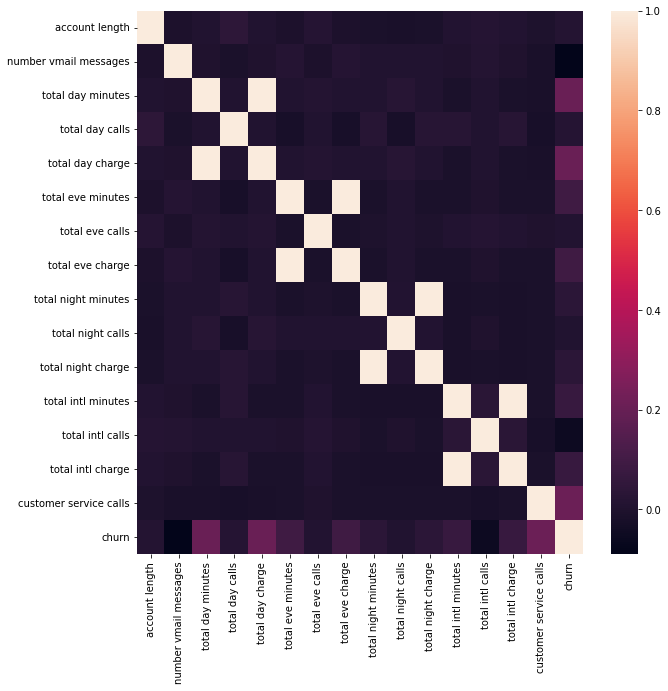

In [ ]:
plt.figure(figsize=(10, 10))
ax = sns.heatmap(df_old.corr())
plt.show()

From this initial plot we were able to see that the number of minutes (day, evening, night, and international) have a direct correlation with the charges inferred. This is expected since the billing of these services is on a per minute basis. Thus we were able to remove the number of minutes in each category while retaining their predictive power in the form of charge inferred. In addition to the use and plan information seen above, the dataset also included location data at the state resolution. We then decided to assess if location was a strong predictor. The precentage of customers that left was calculated (see below).

In [ ]:
total = {}
lost = {}
for i in range(len(df_old)):
    state = df_old.loc[i, 'state']
    if state in total:
        total[state] += 1
        if df_old.loc[i, 'churn']:
            lost[state] += 1
    else:
        total[state] = 0
        lost[state] = 0
states = []
for key in total:
    result = (lost[key] / total[key]) * 100
    string = key + ("{ans: 2.2f} %")
    states.append(string.format(ans=result))
states.sort()
for state in states:
    print(state)

AK 5.88 %
AL 10.13 %
AR 20.37 %
AZ 6.35 %
CA 27.27 %
CO 12.31 %
CT 16.44 %
DC 7.55 %
DE 15.00 %
FL 12.90 %
GA 15.09 %
HI 5.77 %
IA 6.98 %
ID 12.50 %
IL 8.77 %
IN 11.43 %
KS 18.84 %
KY 13.79 %
LA 8.00 %
MA 17.19 %
MD 23.19 %
ME 21.31 %
MI 22.22 %
MN 18.07 %
MO 11.29 %
MS 20.31 %
MT 20.90 %
NC 16.42 %
ND 9.84 %
NE 8.33 %
NH 16.36 %
NJ 26.87 %
NM 9.84 %
NV 21.54 %
NY 17.07 %
OH 12.99 %
OK 15.00 %
OR 14.29 %
PA 18.18 %
RI 9.38 %
SC 23.73 %
SD 13.56 %
TN 9.62 %
TX 25.35 %
UT 14.08 %
VA 6.58 %
VT 11.11 %
WA 21.54 %
WI 9.09 %
WV 9.52 %
WY 11.84 %


We note that while there is quite a spread of churn rates by state, the highest, California, only has a rate of 27.27%. Which is consistant with the overall low churn rate of 16.95%.

In [ ]:
df_old.shape
df_old['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

It is worth noting that the data set in question is complete, with all data present for each individual sampled.

In [ ]:
df_old.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

Further information about the dataset, the parameters included, and some simple statistics of these parameters are summarized in the tables below.

In [ ]:
df_old.describe(include='all')

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333,3333.000000,3333,3333,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,51,NaN,3,3333,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,"""415""",382-4657,no,no,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,106,NaN,1655,1,3010,2411,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.064806,NaN,NaN,NaN,NaN,8.099010,179.775098,100.435644,30.562307,...,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,39.822106,NaN,NaN,NaN,NaN,13.688365,54.467389,20.069084,9.259435,...,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,NaN,NaN,NaN,NaN,0.000000,143.700000,87.000000,24.430000,...,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,NaN,NaN,NaN,NaN,0.000000,179.400000,101.000000,30.500000,...,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,NaN,NaN,NaN,NaN,20.000000,216.400000,114.000000,36.790000,...,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


In [ ]:
df_old.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   object 
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

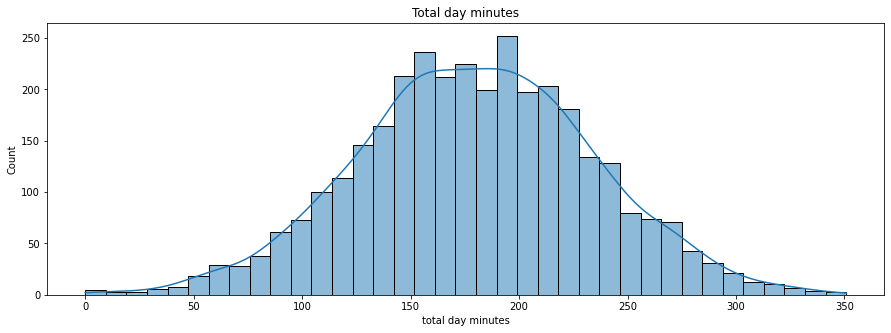

In [ ]:
plt.figure(figsize=(15, 5))
sns.histplot(data = df_old['total day minutes'], kde =True)
plt.title('Total day minutes')
plt.show()

We noted some correlation between the number of customer service calls and the rate of churn. With a higher number of customer service calls seemingly predicting a greater rate of churn. (see below)

<Figure size 360x360 with 0 Axes>

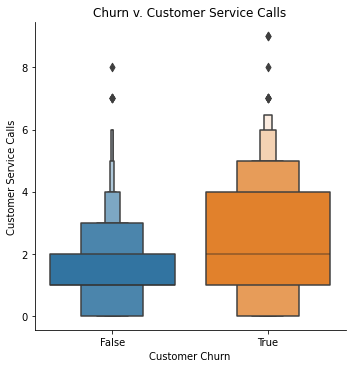

In [ ]:
plt.figure(figsize=(5, 5))
callsVchurn = sns.catplot(data = df_old, y="customer service calls", x="churn", kind = 'boxen')
callsVchurn.set(xlabel="Customer Churn", ylabel="Customer Service Calls", title = "Churn v. Customer Service Calls")

In addition to the number of customer service calls, the number of day time minutes also appears higher in customers who eventually left. Although we note that area code had little effect on this. (see below)

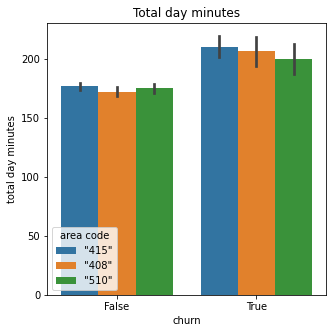

In [ ]:
plt.figure(figsize=(5, 5))
sns.barplot(data = df_old, x= "churn", y= "total day minutes", hue = "area code")
plt.title('Total day minutes')
plt.show()

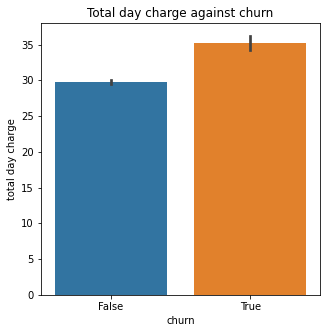

In [ ]:
plt.figure(figsize=(5, 5))
sns.barplot(data = df_old, x= "churn", y= "total day charge")
plt.title('Total day charge against churn')
plt.show()

As is expected the total day minutes is perfectly correlated to the total day charge, which confirms our assumption that the charge is linearly calculated from the minutes. (below)

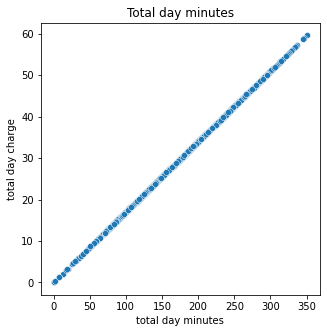

In [ ]:
plt.figure(figsize=(5, 5))
sns.scatterplot(data = df_old, x= "total day minutes", y= "total day charge")
plt.title('Total day minutes')
plt.show()

In [ ]:
df_old['phone number'].unique()
df_old.rename(columns = {'area code':'area_code'}, inplace = True)
df_old.rename(columns = {'international plan':'intl'}, inplace = True)
df_old.rename(columns = {'voice mail plan':'vmail'}, inplace = True)

df_old['intl'] = df_old['intl'].map({'yes': 1, 'no': 0})
df_old['vmail'] = df_old['vmail'].map({'yes': 1, 'no': 0})
#df_old['churn'] = df_old['churn'].map({'yes':1, 'no':0})

from sklearn.preprocessing import OneHotEncoder

new_state= pd.get_dummies(df_old.state)
new_area = pd.get_dummies(df_old.area_code)

df_old = pd.concat([df_old, new_state, new_area], axis='columns')
df_old = df_old.drop(['state', 'area_code', 'phone number', 'UT', ], axis = 'columns')




In [ ]:
totalCharge = df_old["total day charge"] + df_old["total eve charge"] + df_old["total night charge"]
totalMin = df_old["total day minutes"] + df_old["total eve minutes"] + df_old["total night minutes"]
totalCalls = df_old["total day calls"] + df_old["total eve calls"] + df_old["total night calls"]
final = df_old.drop(columns = ["total day charge", "total eve charge", "total night charge", "total day minutes", "total eve minutes","total night minutes", "total day calls", "total eve calls","total night calls"])
final["total charge"] = totalCharge
final["total minutes"] = totalMin
final["total calls"] = totalCalls

correlation = final.corr()
correlation

,account length,intl,vmail,number vmail messages,total intl minutes,total intl calls,total intl charge,customer service calls,churn,AK,...,WA,WI,WV,WY,"""408""","""415""","""510""",total charge,total minutes,total calls
account length,1.000000,0.024735,0.002918,-0.004628,0.009514,0.020661,0.009546,-0.003796,0.016541,-0.012244,...,0.003555,-0.008476,-0.025631,0.018058,0.011823,0.000102,-0.011931,0.000770,-0.005080,0.026157
intl,0.024735,1.000000,0.006006,0.008745,0.045871,0.017366,0.045780,-0.024522,0.259852,-0.008505,...,-0.017442,0.002959,-0.018913,0.017134,-0.023869,-0.021066,0.048109,0.045191,0.024422,0.012841
vmail,0.002918,0.006006,1.000000,0.956927,-0.001318,0.007618,-0.001276,-0.017824,-0.102148,0.008743,...,-0.039753,0.006313,-0.001233,-0.014735,-0.018265,0.017682,-0.002112,0.008689,0.014542,-0.001356
number vmail messages,-0.004628,0.008745,0.956927,1.000000,0.002856,0.013957,0.002884,-0.013263,-0.089728,0.008818,...,-0.036747,0.002070,0.008308,-0.017748,-0.018240,0.018772,-0.003391,0.009572,0.014688,-0.004925
total intl minutes,0.009514,0.045871,-0.001318,0.002856,1.000000,0.032304,0.999993,-0.009640,0.068239,-0.009835,...,-0.022806,-0.027308,-0.010997,0.008606,-0.023029,0.037766,-0.020480,-0.016807,-0.020916,0.009903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""415""",0.000102,-0.021066,0.017682,0.018772,0.037766,0.033289,0.037786,-0.006628,-0.006535,-0.008815,...,-0.029169,-0.014809,-0.002169,0.011047,-0.575559,1.000000,-0.576476,0.031588,0.029309,0.023752
"""510""",-0.011931,0.048109,-0.002112,-0.003391,-0.020480,-0.025761,-0.020583,0.026900,0.006423,0.004989,...,0.001817,0.006134,0.028690,-0.001867,-0.336407,-0.576476,1.000000,-0.009272,-0.008304,-0.004861
total charge,0.000770,0.045191,0.008689,0.009572,-0.016807,0.005460,-0.016759,-0.019205,0.226962,-0.024496,...,0.000380,-0.007128,-0.035438,0.005891,-0.027125,0.031588,-0.009272,1.000000,0.891674,0.021061
total minutes,-0.005080,0.024422,0.014542,0.014688,-0.020916,-0.000648,-0.020881,-0.020666,0.196457,-0.037273,...,0.001534,-0.009995,-0.036684,0.006050,-0.025468,0.029309,-0.008304,0.891674,1.000000,0.017932


Since the separate variables for day, evening, and night for each charge, calls, and minutes were not highly correlated with the response (churn), we combined each of the day + evening + night columns. This reduced the numbers of columns in our dataset while maintaining all the information.

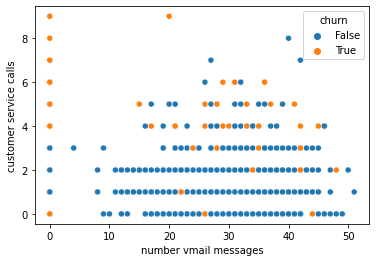

In [ ]:
sns.scatterplot(y='customer service calls', x='number vmail messages', hue='churn', data=final)

We note that 'customer service calls' and the number of voicemail messages were both found to be important predictors of churn. The above plot shows this space illustrating the trend.

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
def featureSelection(x, y, k):
    select = SelectKBest(score_func = chi2, k = k)
    z = select.fit(x, y)
    cols = z.get_support(indices = True)
    return(cols)

cols = featureSelection(final.loc[:, final.columns != "churn"], final['churn'], 5)
features = final.iloc[:,cols]
features

,intl,number vmail messages,customer service calls,"""510""",total charge
0,0,25,1,0,72.86
1,0,26,1,0,55.54
2,0,0,0,0,59.00
3,1,0,2,0,65.02
4,1,0,3,0,49.36
...,...,...,...,...,...
3328,0,36,2,0,57.43
3329,0,0,3,0,60.94
3330,0,0,2,1,63.93
3331,1,0,2,1,56.18


Finally, we run feature selection and display the five variables most highly correlated with churn: international voicemail plan, number of voicemail messages, customer service calls, area code 510, and total charge.

In [ ]:
features["churn"] = final.loc[:,"churn"]
final = features
final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,intl,number vmail messages,customer service calls,"""510""",total charge,churn
0,0,25,1,0,72.86,False
1,0,26,1,0,55.54,False
2,0,0,0,0,59.00,False
3,1,0,2,0,65.02,False
4,1,0,3,0,49.36,False
...,...,...,...,...,...,...
3328,0,36,2,0,57.43,False
3329,0,0,3,0,60.94,False
3330,0,0,2,1,63.93,False
3331,1,0,2,1,56.18,False


##**Quadradic Discriminant Analysis**

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

Based on the above data exploration, it was determined that the number of voicemails and the number of customer service calls were both potential predictors of churn. With that in mind Quadratic Discriminant Analysis (QDA) was used to build a model with the aforementioned variables. (see below) It should be noted, that this model was trained and tested on an approximate 70-30 random partition of the data.

In [ ]:
dfs = np.array_split(df_old, 10)
Test_set = pd.concat([dfs[7], dfs[3], dfs[1]])
Train_set = pd.concat([dfs[9], dfs[8], dfs[6], dfs[0], dfs[2], dfs[4], dfs[5]])
x = Train_set[['number vmail messages', 'customer service calls']]
y = Train_set['churn'].astype(int)  
xTest = Test_set[['number vmail messages', 'customer service calls']]
yTest = Test_set['churn'].astype(int)  
model = QuadraticDiscriminantAnalysis()
model.fit(x, y)

QuadraticDiscriminantAnalysis()

In [ ]:
y_hat = cross_val_predict(model, xTest, yTest, cv=10)
confusion = confusion_matrix(yTest, y_hat)
print(confusion)

[[841  11]
 [127  21]]


This initial model was then assessed using cross validation and the confusion matrix was calculated (see above). We observe a total accuracy of 86.2% and an abysmal false negative rate of 85.81%. While these numbers are good we wanted to try and further improve the model. To do this we included the total day charge.

###**Confusion Matrix**

In [ ]:
x = df_old[['number vmail messages', 'customer service calls', 'total day charge' ]]
y = df_old['churn'].astype(int)  
model = QuadraticDiscriminantAnalysis()
model.fit(x, y)
y_hat = cross_val_predict(model, xTest, yTest, cv=10)
confusion = confusion_matrix(yTest, y_hat)
print(confusion)

[[841  11]
 [127  21]]


This second model was also assessed using cross validation and the confusion matrix was calculated (see above). We observe no change in total accuracy, the model's performance leaves a lot to be desired in the context of the project. This may, in part, be due to the high flexibility of the model which struggles with over fitting of the generally poorly correlated predictors. 

## **Naive Bayes**

In [ ]:
final = df_old[['churn']]  

In [ ]:
from sklearn.model_selection import train_test_split
x = df_old[['number vmail messages', 'customer service calls']]
y = df_old['churn'].astype(int)  #Transformed to dummy variable.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 101)

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

nb = GridSearchCV(estimator=GaussianNB(),
param_grid= param_grid_nb, verbose=1, cv=10, n_jobs=-1)
#nb = GaussianNB()
nb.fit(X_train, y_train)


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.848035...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             verbose=1)

###**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
print("Naive Bayes score: ",nb.score(X_test, y_test))
auc_nb = roc_auc_score(y, nb.predict_proba(x)[:, 1])
y_pred2 = nb.predict(X_test)
conf2 = confusion_matrix(y_pred2, y_test)
print(conf2)

print("AUC score for Naive Baiyes", auc_nb)

Naive Bayes score:  0.8800599700149925
[[577  72]
 [  8  10]]
AUC score for Naive Baiyes 0.6621248774109187


The Logistic Regression model has a correct prediction rate of 88.00% and a false negative rate of 87.80%.

##**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr= LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

### Confusion Matrix

In [ ]:
model_prediction = lr.predict(X_test)
print("Logistic Regression score: ",lr.score(X_test, y_test))
parameter = lr.coef_
print(parameter)
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
auc_lr= roc_auc_score(y, lr.predict_proba(x)[:, 1])
print("Auc Score for Logistic Regression", auc_lr)

y_pred = lr.predict(X_test)
y_pred

from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_pred, y_test)

print(conf)

Logistic Regression score:  0.8770614692653673
[[-0.0225137   0.39471688]]
Auc Score for Logistic Regression 0.6423755039773347
[[584  81]
 [  1   1]]


The Logistic Regression model has a correct prediction rate of 87.71% and a false negative rate of 98.78%.   

##**Discussion**

The goal of this project was to use the extensive data at our disposal to build a predictive model of churn within the customer base. To accomplish that we first began by exploring the data set metrics available to us. From a large number of initial variables we were able to identify the five most associated with churn. Based on some (or all) of these metrics we were able to train three types of models: Logistic Regression, QDA, and Naive Bayes. We then used these models to try and predict churn, with the performance of each model assessed on a test subset of the data. Interestingly the Naive Bayes showed the best performance, albeit only slightly. The overall accuracy was 86.2% compared to 86.2% and 87.71% for QDA, and Logistic Regression, respectively. Although these models show high overall accuracy they struggle to actually predict churn with false negative rates of 85.81%, 87.80%, and 98.78% for QDA, Naive Bayes, and Logistic Regression, respectively. Surprisingly, QDA shows the best performance in regards to minimizing the false negative rate. This rate is important because the goal of the project is to predict when a customer is at risk of churning so that action can be taken to retain them. In conclusion, while all three models performed comparably well when classifying churn, there were significant differences when considering their performance in light of the false negative rate. In this light QDA performed the best. This seemingly contradictory situation can best be explained by the unbalanced nature of the data in question, which has only about 16% churn. This allows our models to have an overall accuracy of 87% while performing poorly in predicting churn. There are several different techniques that could be applied in future work to try and address this imbalance. It is also worth pointing out that some of the most correlated metrics lack an obvious explanation, for example the number of customer service calls clearly indicates the customer is struggling to use the product, but the strong correlation with the area code 510 lacks obvious explanation. These inexplicable relations may be a productive area of future investigation. 

  

## **Citations**

Ahmed, A., & Linen, D. M. (2017, January). A review and analysis of churn prediction methods for customer retention in telecom industries. In 2017 4th International Conference on Advanced Computing and Communication Systems (ICACCS) (pp. 1-7). IEEE.